In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [191]:
# Preprocessing tasks
# Centering: OK, Scaling: OK
def g(u):
    return u*np.exp(-(u**2)/2)

def g_prime(u):
    return (1-u**2)*np.exp(-(u**2)/2)

def decorrelation(w, W, j):
    t = np.zeros_like(w)
    w=w.reshape(-1,)
    for u in range(j):
        t = t + np.dot(w, W[u]) * W[u]
        w -= t
    w=w.reshape(-1,1)
    return w

def fastica(X, tol = 0.0001, t_max = 200):
    "Comuting fastICA on matrix X by the deflation method"
    n_comp = X.shape[0] #number of component
    W = np.zeros((n_comp, n_comp), dtype=float)

    # j is the index of the component
    for j in range(n_comp):
        w = np.random.normal(size=n_comp)
        w = w.reshape(-1,1)
        w /= np.sqrt((w**2).sum())
        print('w' , w.shape)

        n_iterations = 0
        
        test = tol + 1 
        while ((test > tol) & (n_iterations < (t_max-1))):
            wtx = np.dot(w.T, X)
            gwtx = g(wtx)
            g_prime_wtx = g_prime(wtx)
            w1 = (X*gwtx).mean(axis=1).reshape(-1,1) - g_prime_wtx.mean()*w
            w1 = decorrelation(w1, W, j)
            w1 /= np.sqrt((w1**2).sum())

            test = np.abs(np.abs((w1 * w).sum()) - 1)
            w = w1
            n_iterations = n_iterations + 1  
        #actualisation
        for k in range(j):
            W[j,k] = w[k]

    return W

In [197]:
#Generating Random signals 
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples) 
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]

# Adding nois in the Signal matrix S
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)  # Standardize data
# Defining an arbitrary matrix A to mix the data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(A, S.T)  # Mixing the signals 


In [194]:
#using our function fastica to recover the signal  
W = fastica(X)
res = np.dot(W,X) #computing W*X sould give us the original signal matrix S
Strans = S.T

w (3, 1)
(3, 1)
(3, 1)
(3, 1)
w (3, 1)


ValueError: non-broadcastable output operand with shape (3,) doesn't match the broadcast shape (3,3)

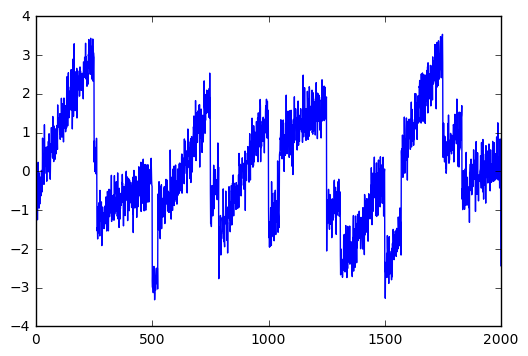

In [196]:
plt.plot(res[2,:])
plt.show()


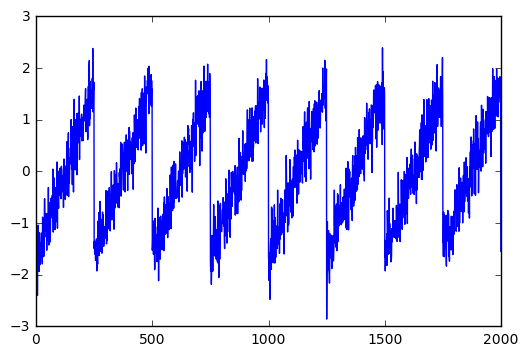

In [195]:
plt.plot(Strans[2,:])
plt.show()